# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are built by splitting the data based on feature values that maximize a purity metric.
2. Trees handle non-linear relationships by splitting data into regions. Each region corresponds to a rule, which can capture complex boundaries. Trees do not assume linearity.
3. The Gini impurity measures how complex the classes are in a node, which makes it effective for classification trees.
4. Trees tend to overfit because they can keep splitting and are prone to modeling noise. This tendency can be constrained by limiting tree depth.
5. False. Trees work well with both categorical and numerical variables and can handle mixted data types.
6. Because binary splits are simpler and efficient, support easier recursion and tree structure, and allow finer control over decision boundaries.
7. Overfiting for deep tree levels and trees with few samples. Underfiting for shallow tree with low accuracy.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Lisabyy/trees/refs/heads/main/assignment/data/cars_hw.csv')
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Shape: (976, 12)

Columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']

First few rows:
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol     

In [4]:
#2
# Encode categorical variables
categorical = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

# Select predictors and target
features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
X = df_encoded[features]
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
#3
# Search for best min_samples_leaf
r2_scores = []
leaf_range = range(1, 26)
for leaf in leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    r2_scores.append(r2)

best_leaf = leaf_range[np.argmax(r2_scores)]
print(f"\nBest min_samples_leaf: {best_leaf} with R^2: {max(r2_scores):.4f}")


Best min_samples_leaf: 11 with R^2: 0.3434



Tree R^2: 0.3434, RMSE: 274634.95


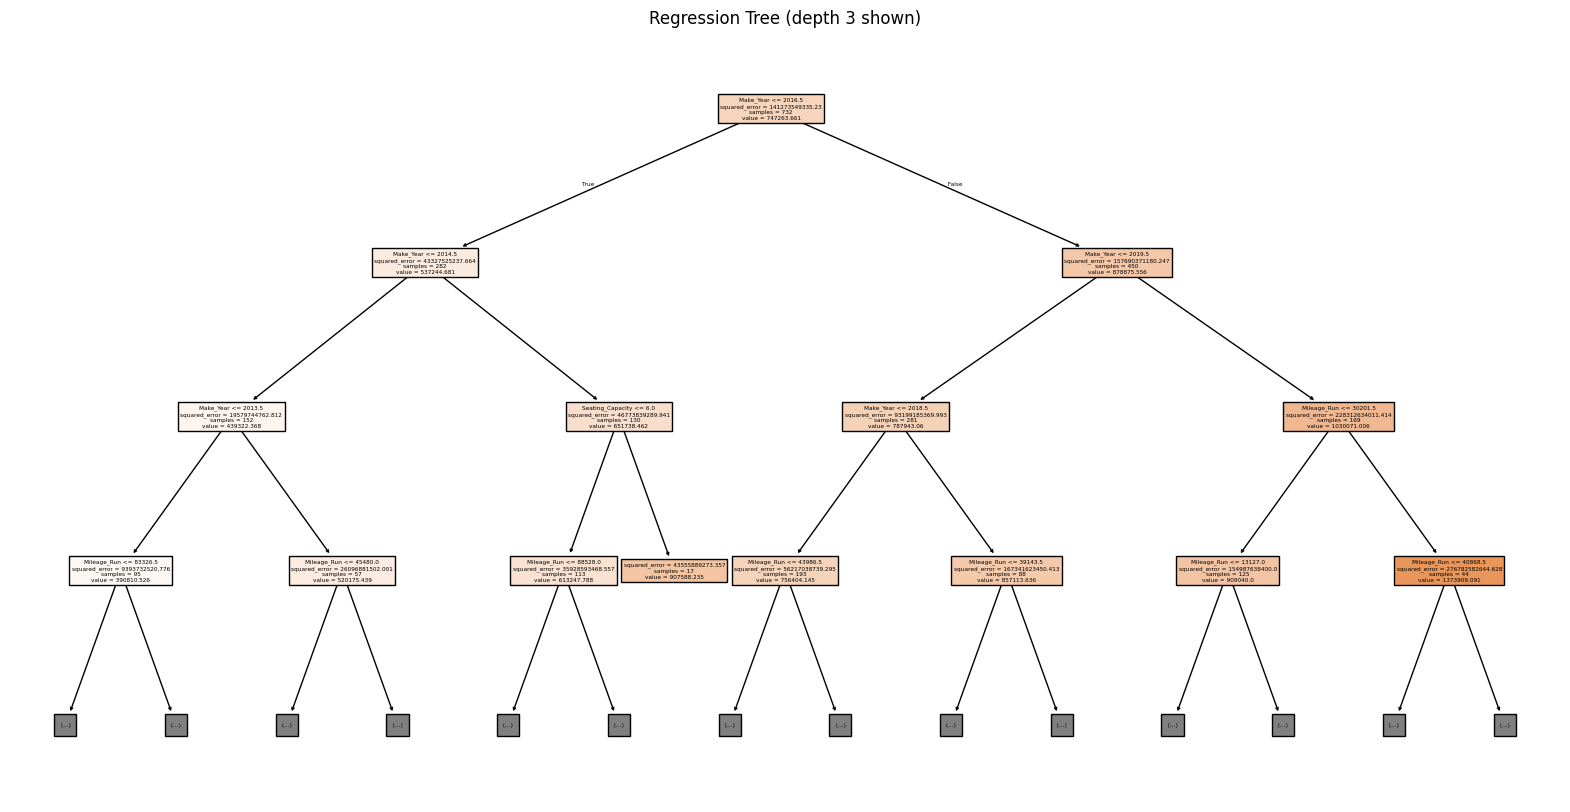

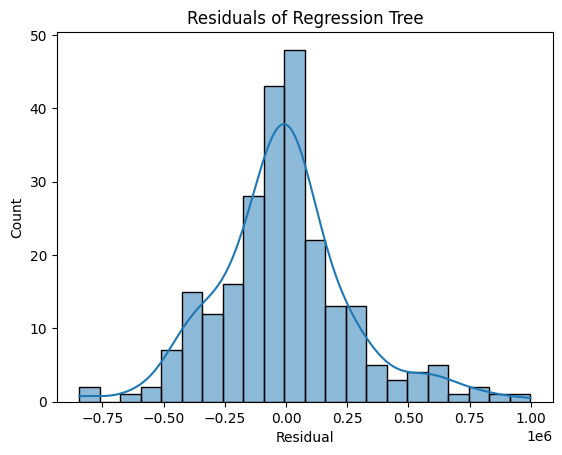

In [6]:
#4
# Fit model with best leaf size
tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"\nTree R^2: {r2_tree:.4f}, RMSE: {rmse_tree:.2f}")

# Plot tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Regression Tree (depth 3 shown)")
plt.show()

# Residual plot
residuals = y_test - y_pred_tree
sns.histplot(residuals, kde=True)
plt.title("Residuals of Regression Tree")
plt.xlabel("Residual")
plt.show()

In [7]:
#5
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"\nLinear Model R^2: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")


Linear Model R^2: 0.3202, RMSE: 279429.83


Trees perform better on the test set, capturing non-linearities and interactions.

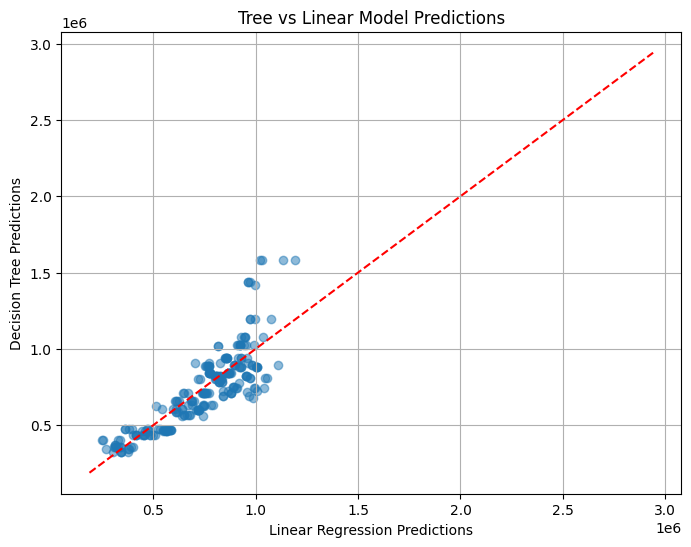

In [8]:
#6
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, y_pred_tree, alpha=0.5)
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Tree vs Linear Model Predictions")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

Trees don't show perfectly linear predictions as the linear regression. Trees capture non-linearly and tend to underpredict when linear regression gives high values.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [9]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Lisabyy/trees/refs/heads/main/assignment/data/corporate_ratings.csv')
print("Shape:", df.shape)
print(df.head())

Shape: (2029, 31)
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203

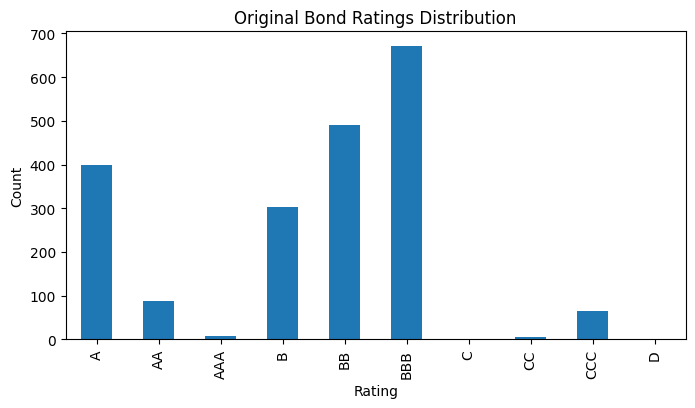

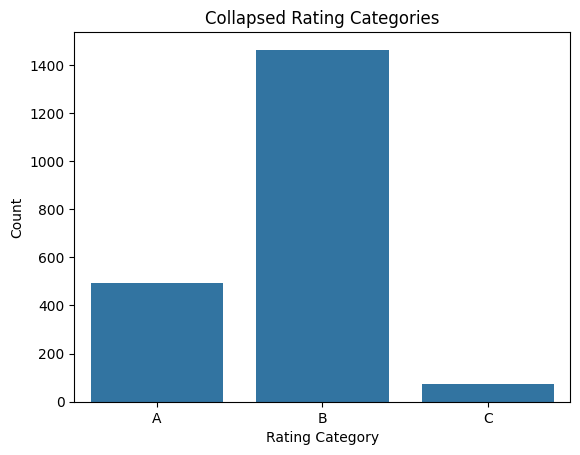

In [12]:
#2
plt.figure(figsize=(8, 4))
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Original Bond Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Collapse ratings into broad categories
rating_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C', 'D': 'C'
}
df['Rating_Cat'] = df['Rating'].map(rating_map)

sns.countplot(data=df, x='Rating_Cat', order=['A', 'B', 'C'])
plt.title("Collapsed Rating Categories")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.show()

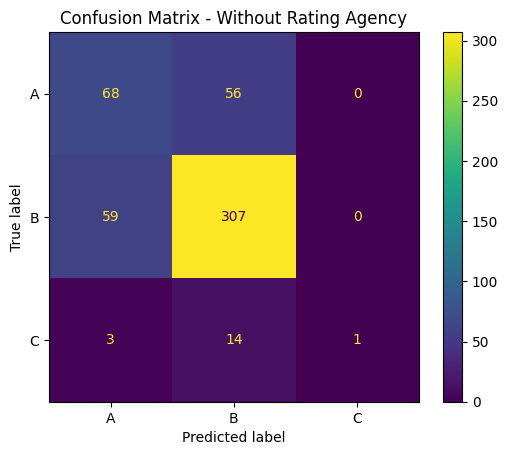


Model Accuracy (no agency): 0.7402


In [17]:
#3 #4
# Prepare features
X = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name', 'Rating_Cat'])
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)
y = df['Rating_Cat']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])
ConfusionMatrixDisplay(cm, display_labels=['A', 'B', 'C']).plot()
plt.title("Confusion Matrix - Without Rating Agency")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (no agency): {accuracy:.4f}")

The matrix predicts the corporate bond rating with an accuracy of 0.7402.

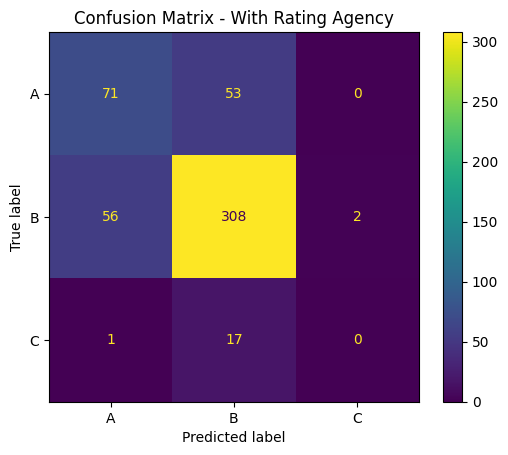


Model Accuracy (with agency): 0.7461


In [18]:
#5
X2 = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating_Cat'])
X2 = pd.get_dummies(X2, columns=['Sector', 'Rating Agency Name'], drop_first=True)

X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y, stratify=y, random_state=42)

clf2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf2.fit(X2_train, y_train2)
y_pred2 = clf2.predict(X2_test)

cm2 = confusion_matrix(y_test2, y_pred2, labels=['A', 'B', 'C'])
ConfusionMatrixDisplay(cm2, display_labels=['A', 'B', 'C']).plot()
plt.title("Confusion Matrix - With Rating Agency")
plt.show()

accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"\nModel Accuracy (with agency): {accuracy2:.4f}")

The results change with a higher model accuracy for the predictions.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?